# Importing Necessory Libaries

In [1]:
#https://github.com/bissessk/Regression-Analysis-of-COVID-19/blob/master/regressionAnalysisCOVID19.ipynb  - github covid pediction
import pandas as pd
import numpy as np
import pandas as pd;
from sklearn.svm import SVR
import numpy  as np;
import scipy.integrate;
import matplotlib.pyplot as plt;
import copy;
import seaborn as sns
from   sklearn.metrics       import mean_squared_error, mean_absolute_error;
from   sklearn.linear_model  import LinearRegression, BayesianRidge;
from   sklearn.tree          import DecisionTreeRegressor;
from   sklearn.preprocessing import PolynomialFeatures
from   sklearn.metrics       import r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn import tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;

# Connecting to Dataset

In [2]:
df=pd.read_csv("C:/Users/HP/Desktop/crime prediction/complete -crime-and-economic-factors.csv")
df.head()

,Year,Counterfeiting,Riots,Dacoity,Buglary,GDP growth,Unemployment,Poverty,Inflation
0,1990,3732,135038,17888,165742,5.533455,5.55,49.5,10.668304
1,1991,6237,138616,19522,163837,1.056831,5.60,49.0,13.751819
2,1992,7631,139110,20798,160838,5.482396,5.73,48.7,8.965152
3,1993,6495,134871,20036,156806,4.750776,5.69,47.8,9.861783
4,1994,5604,128628,18904,155075,6.658924,5.74,47.0,9.980045


<AxesSubplot:>

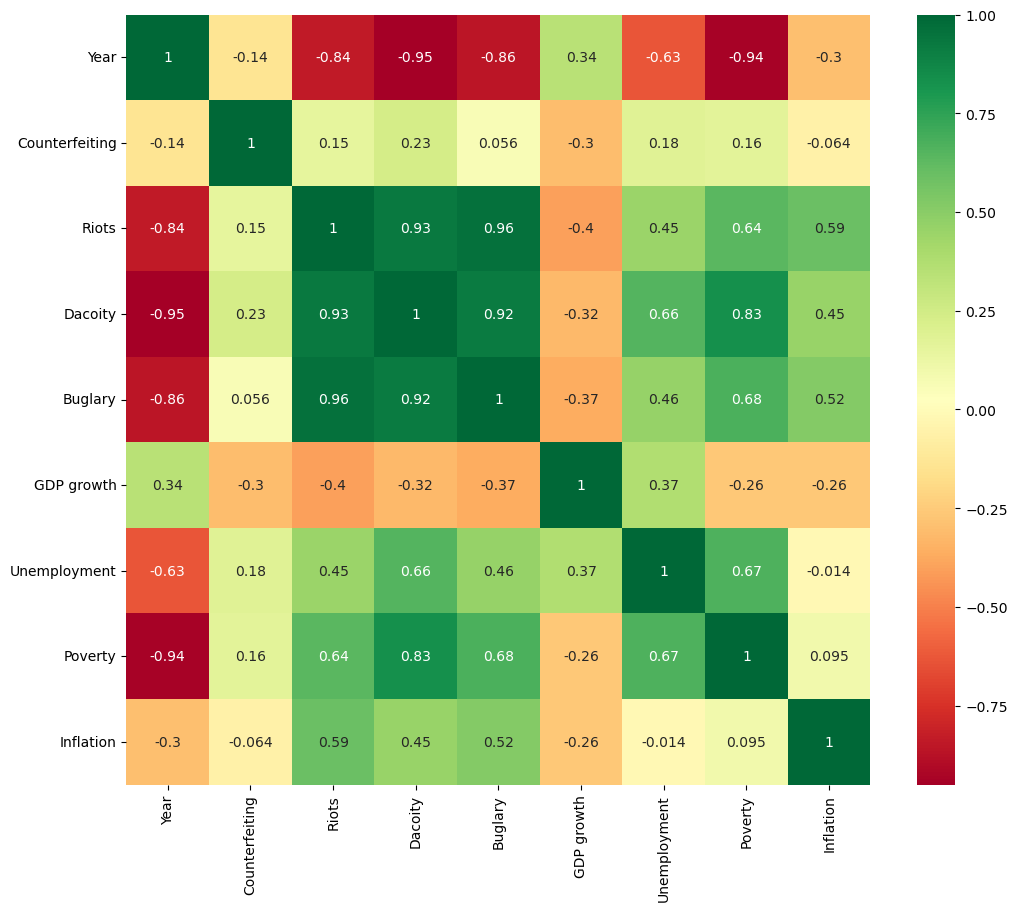

In [3]:
df1=df.select_dtypes(include=np.number)
corrmat = df1.corr()
plt.figure(figsize=(12,10))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

# Feature Scaling

In [4]:
# MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range = (0,1))
scaled=scalar.fit_transform(df)
scaled_df=pd.DataFrame(scaled,columns=['Year', 'Counterfeiting', 'Riots', 'Dacoity', 'Buglary', 'GDP growth', 'Unemployment', 'Poverty','Inflation'])
# scaled_df

# Models Used:
#####                                      1. Linear Regression
#####                                      2. Polynomial Regression
#####                                      3. SVM (Support Vector Machine)
#####                                      4. Decision Tree
#####                                      5. Random Forest
#####                                      6. XGBoost

# 1. Linear Regression

In [5]:
def lin_reg(eco,crime,X_train, X_test, y_train, y_test):

#Linear Regression
    print(eco,"Vs",crime," Linear Regression")
    print("\n")
#     X = np.array(scaled_df[eco]).reshape(-1,1)
#     y = np.array(scaled_df[crime]).reshape(-1,1)
#     #print(X)
#     #print(y)
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)
    lin_model = LinearRegression();
    lin_model.fit(X_train,y_train);
    test_lin_pred = lin_model.predict(X_test)
    print('MAE of Linear Regression:', mean_absolute_error(y_test,test_lin_pred))
    print('MSE of Linear Regression:',mean_squared_error(y_test,test_lin_pred))
    print("Coefficient of determination",r2_score(y_test,test_lin_pred))
    #correlation
    df_x=pd.DataFrame(y_test,columns=['x'])
    df_y=pd.DataFrame(test_lin_pred,columns=['y'])
    n=df_x.shape[0]
    df_x2=df_x*df_x
    df_x2=pd.DataFrame(df_x2.to_numpy(),columns=['x2'])
    df_y2=df_y*df_y
    df_y2=pd.DataFrame(df_y2.to_numpy(),columns=['y2'])
    df_xy=df_x['x']*df_y['y']
    df_xy=pd.DataFrame(df_xy.to_numpy(),columns=['xy'])
    sum_x=df_x['x'].sum()
    sum_y=df_y['y'].sum()
    prod_xy=df_xy['xy'].sum()
    sum_x2=df_x2['x2'].sum()
    sum_y2=df_y2['y2'].sum()
    sum_num=(n*prod_xy)-(sum_x*sum_y)
    sum_den=(((n*sum_x2)-(sum_x*sum_x))*((n*sum_y2)-(sum_y*sum_y)))
    r=sum_num/np.sqrt(sum_den)
    print("Correlation:",r)
    
#     plt.scatter(X_train, y_train,color='g') 
#     plt.plot(X_test, test_lin_pred,color='k') 
#     plt.show()
    
    print("\n")

# 2. Polynomial Regression

In [6]:
def poly_reg(eco,crime,X_train, X_test, y_train, y_test):
    print(eco,"Vs",crime," Polynomial Regression")
    print("\n")
#     X = np.array(scaled_df[eco]).reshape(-1,1)
#     y = np.array(scaled_df[crime]).reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)
    poly = PolynomialFeatures(degree=2)
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test  = poly.fit_transform(X_test)
    poly_X = poly.fit_transform(X)

    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train, y_train)
    test_linear_pred = linear_model.predict(poly_X_test)
    linear_pred = linear_model.predict(poly_X)

    print('MAE of Poly :', mean_absolute_error(y_test,test_linear_pred))
    print('MSE of Poly:',mean_squared_error(y_test,test_linear_pred))
    #print(r2_score(y_test,test_linear_pred))
    print("Coefficient of Determination:",r2_score(y_test,test_linear_pred))

    #correlation


    df_x=pd.DataFrame(y_test,columns=['x'])
    df_y=pd.DataFrame(test_linear_pred,columns=['y'])
    #df_y=df_y.dropna()
    #df_x=df_x.dropna()
    #n=df_x.shape[0]
    #print(df_y)
    #print(df_x)
    df_x2=df_x*df_x
    df_x2=pd.DataFrame(df_x2.to_numpy(),columns=['x2'])
    #print(df_x2)
    df_y2=df_y*df_y
    df_y2=pd.DataFrame(df_y2.to_numpy(),columns=['y2'])
    df_xy=df_x['x']*df_y['y']
    n=df_x.shape[0]
    #df_xy=df_x.mul(df_y)
    #print(df_xy)
    df_xy=pd.DataFrame(df_xy.to_numpy(),columns=['xy'])
    sum_x=df_x['x'].sum()
    #print("sum_x=",sum_x)
    sum_y=df_y['y'].sum()
    #print("sum_y=",sum_y)
    prod_xy=df_xy['xy'].sum()
    #print("sum_xy=",prod_xy)
    sum_x2=df_x2['x2'].sum()
    #print("sum_x2=",sum_x2)
    sum_y2=df_y2['y2'].sum()
    #print("sum_y2=",sum_y2)
    sum_num=(n*prod_xy)-(sum_x*sum_y)
    #print("sum_num=",sum_num)
    sum_den=(((n*sum_x2)-(sum_x*sum_x))*((n*sum_y2)-(sum_y*sum_y)))
    #print("sum_den=",sum_den)
    r=sum_num/np.sqrt(sum_den)
    print("Correlation:",r)
    
#     plt.scatter(X_train, y_train,color='g') 
#     plt.plot(X_test, test_linear_pred,color='k') 
#     plt.show()
    
    print("\n")

# 3.SVM(Support Vector Machine)

In [7]:
def svm(eco,crime,X_train, X_test, y_train, y_test):
    print(eco,"Vs",crime,"SVM")
    print("\n")
#     X = np.array(scaled_df[eco]).reshape(-1,1)
#     y = np.array(scaled_df[crime]).reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)
    from sklearn.svm import SVR

    
    svm_search = SVR();

    svm_search.fit(X_train, y_train) # note how y_train had to be put first
    #print(svm_search.best_params_)
    y_pred_test = svm_search.predict(X_test)
    print('MAE:', mean_absolute_error(y_test,y_pred_test))
    print('MSE:',mean_squared_error(y_test,y_pred_test))
    print("Coefficient of determination:",r2_score(y_test,y_pred_test))

    #correlation


    df_x=pd.DataFrame(y_test,columns=['x'])
    df_y=pd.DataFrame(y_pred_test,columns=['y'])
    #df_y=df_y.dropna()
    #df_x=df_x.dropna()
    #n=df_x.shape[0]
    #print(df_y)
    #print(df_x)
    df_x2=df_x*df_x
    df_x2=pd.DataFrame(df_x2.to_numpy(),columns=['x2'])
    #print(df_x2)
    df_y2=df_y*df_y
    df_y2=pd.DataFrame(df_y2.to_numpy(),columns=['y2'])
    df_xy=df_x['x']*df_y['y']
    #df_xy=df_x.mul(df_y)
    #print(df_xy)
    df_xy=pd.DataFrame(df_xy.to_numpy(),columns=['xy'])
    sum_x=df_x['x'].sum()
    #print("sum_x=",sum_x)
    sum_y=df_y['y'].sum()
    #print("sum_y=",sum_y)
    prod_xy=df_xy['xy'].sum()
    #print("sum_xy=",prod_xy)
    sum_x2=df_x2['x2'].sum()
    #print("sum_x2=",sum_x2)
    sum_y2=df_y2['y2'].sum()
    #print("sum_y2=",sum_y2)
    n=df_x.shape[0]
    sum_num=(n*prod_xy)-(sum_x*sum_y)
    #print("sum_num=",sum_num)
    sum_den=(((n*sum_x2)-(sum_x*sum_x))*((n*sum_y2)-(sum_y*sum_y)))
    #print("sum_den=",sum_den)
    r=sum_num/np.sqrt(sum_den)
    print("Correlation:",r)
    #print(df_x)
    print("\n")
    

# 4. Decision Tree

In [8]:
def decision_tree(eco,crime,X_train, X_test, y_train, y_test):
    print(eco,"Vs",crime," Decision tree")
    print("\n")
#     X = np.array(scaled_df[eco]).reshape(-1,1)
#     y = np.array(scaled_df[crime]).reshape(-1,1)

#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)
    DT_reg = DecisionTreeRegressor(random_state=0);
    DT_reg.fit(X_train, y_train);
    y_test_DT_pred = DT_reg.predict(X_test);
    #y_DT_pred = DT_reg.predict(X);
    print('MAE:', mean_absolute_error(y_test_DT_pred, y_test))
    print('MSE:',mean_squared_error(y_test_DT_pred, y_test))
    print("Coefficient of determination:",r2_score(y_test,y_test_DT_pred))


    #correlation


    df_x=pd.DataFrame(y_test,columns=['x'])
    df_y=pd.DataFrame(y_test_DT_pred,columns=['y'])
    #df_y=df_y.dropna()
    #df_x=df_x.dropna()
    n=df_x.shape[0]
    #print(df_y)
    #print(df_x)
    df_x2=df_x*df_x
    df_x2=pd.DataFrame(df_x2.to_numpy(),columns=['x2'])
    #print(df_x2)
    df_y2=df_y*df_y
    df_y2=pd.DataFrame(df_y2.to_numpy(),columns=['y2'])
    df_xy=df_x['x']*df_y['y']
    #df_xy=df_x.mul(df_y)
    #print(df_xy)
    df_xy=pd.DataFrame(df_xy.to_numpy(),columns=['xy'])
    sum_x=df_x['x'].sum()
    #print("sum_x=",sum_x)
    sum_y=df_y['y'].sum()
    #print("sum_y=",sum_y)
    prod_xy=df_xy['xy'].sum()
    #print("sum_xy=",prod_xy)
    sum_x2=df_x2['x2'].sum()
    #print("sum_x2=",sum_x2)
    sum_y2=df_y2['y2'].sum()
    #print("sum_y2=",sum_y2)
    sum_num=(n*prod_xy)-(sum_x*sum_y)
    #print("sum_num=",sum_num)
    sum_den=(((n*sum_x2)-(sum_x*sum_x))*((n*sum_y2)-(sum_y*sum_y)))
    #print("sum_den=",sum_den)
    r=sum_num/np.sqrt(sum_den)
    print("Correlation:",r)
    #print(df_x)
    print("\n")

    tree.plot_tree(DT_reg)
    print("\n")

# 5. Random Forest

In [9]:
def random_for(eco,crime,X_train, X_test, y_train, y_test):
    print(eco,"Vs",crime," Random Forest")
    print("\n")
    
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    print('MAE:', mean_absolute_error(y_test,y_pred))
    print('MSE:',mean_squared_error(y_test,y_pred))
    print("Coefficient of determination:",r2_score(y_test,y_pred))


    #correlation


    df_x=pd.DataFrame(y_test,columns=['x'])
    df_y=pd.DataFrame(y_pred,columns=['y'])
    #df_y=df_y.dropna()
    #df_x=df_x.dropna()
    n=df_x.shape[0]
    #print(df_y)
    #print(df_x)
    df_x2=df_x*df_x
    df_x2=pd.DataFrame(df_x2.to_numpy(),columns=['x2'])
    #print(df_x2)
    df_y2=df_y*df_y
    df_y2=pd.DataFrame(df_y2.to_numpy(),columns=['y2'])
    df_xy=df_x['x']*df_y['y']
    #df_xy=df_x.mul(df_y)
    #print(df_xy)
    df_xy=pd.DataFrame(df_xy.to_numpy(),columns=['xy'])
    sum_x=df_x['x'].sum()
    #print("sum_x=",sum_x)
    sum_y=df_y['y'].sum()
    #print("sum_y=",sum_y)
    prod_xy=df_xy['xy'].sum()
    #print("sum_xy=",prod_xy)
    sum_x2=df_x2['x2'].sum()
    #print("sum_x2=",sum_x2)
    sum_y2=df_y2['y2'].sum()
    #print("sum_y2=",sum_y2)
    sum_num=(n*prod_xy)-(sum_x*sum_y)
    #print("sum_num=",sum_num)
    sum_den=(((n*sum_x2)-(sum_x*sum_x))*((n*sum_y2)-(sum_y*sum_y)))
    #print("sum_den=",sum_den)
    r=sum_num/np.sqrt(sum_den)
    print("Correlation:",r)
    #print(df_x)

    print("\n")

# 6. XGBoost

In [10]:
def xgboost(eco,crime,X_train, X_test, y_train, y_test):
    print(eco,"Vs",crime," Xgboost")
    print("\n")

    xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
    xgb_r.fit(X_train, y_train)
    
    
    
    # Predict the model
    pred = xgb_r.predict(X_test)
    print('MAE:', mean_absolute_error(y_test,pred))
    print('MSE:',mean_squared_error(y_test,pred))
    print("Coefficient of determination:",r2_score(y_test,pred))
    print("Score:",xgb_r.score(X_test,y_test))


    #correlation


    df_x=pd.DataFrame(y_test,columns=['x'])
    df_y=pd.DataFrame(pred,columns=['y'])
    #df_y=df_y.dropna()
    #df_x=df_x.dropna()
    n=df_x.shape[0]
    #print(df_y)
    #print(df_x)
    df_x2=df_x*df_x
    df_x2=pd.DataFrame(df_x2.to_numpy(),columns=['x2'])
    #print(df_x2)
    df_y2=df_y*df_y
    df_y2=pd.DataFrame(df_y2.to_numpy(),columns=['y2'])
    df_xy=df_x['x']*df_y['y']
    #df_xy=df_x.mul(df_y)
    #print(df_xy)
    df_xy=pd.DataFrame(df_xy.to_numpy(),columns=['xy'])
    sum_x=df_x['x'].sum()
    #print("sum_x=",sum_x)
    sum_y=df_y['y'].sum()
    #print("sum_y=",sum_y)
    prod_xy=df_xy['xy'].sum()
    #print("sum_xy=",prod_xy)
    sum_x2=df_x2['x2'].sum()
    #print("sum_x2=",sum_x2)
    sum_y2=df_y2['y2'].sum()
    #print("sum_y2=",sum_y2)
    sum_num=(n*prod_xy)-(sum_x*sum_y)
    #print("sum_num=",sum_num)
    sum_den=(((n*sum_x2)-(sum_x*sum_x))*((n*sum_y2)-(sum_y*sum_y)))
    #print("sum_den=",sum_den)
    r=sum_num/np.sqrt(sum_den)
    print("Correlation:",r)
    #print(df_x)
    print("\n")

# Poverty vs Riots

In [11]:
X = np.array(scaled_df['Poverty']).reshape(-1,1)
y = np.array(scaled_df['Riots']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)

Poverty Vs Riots  Linear Regression


MAE of Linear Regression: 0.2794725313743119
MSE of Linear Regression: 0.08949630161703628
Coefficient of determination 0.41293398838790707
Correlation: 0.6989527770056797


Poverty Vs Riots  Polynomial Regression


MAE of Poly : 0.1704491900293546
MSE of Poly: 0.035085884269383326
Coefficient of Determination: 0.7698482532825758
Correlation: 0.8794853524400936


Poverty Vs Riots  SVM with hypermeter


MAE: 0.11566098274601481
MSE: 0.01581243705809242
Coefficient of determination: 0.8962756651410666
Correlation: 0.9704584122725407


Poverty Vs Riots  Decision tree


MAE: 0.08917919621523687
MSE: 0.013066451835461571
Coefficient of determination: 0.9142884160980153
Correlation: 0.9638193744136266




Poverty Vs Riots  Random Forest


MAE: 0.09652951992673621
MSE: 0.012051715353552947
Coefficient of determination: 0.9209447503655531
Correlation: 0.9644238539011999


Poverty Vs Riots  Xgboost


[17:15:02] WARNING: C:/buildkite-agent/builds/buildkite-w

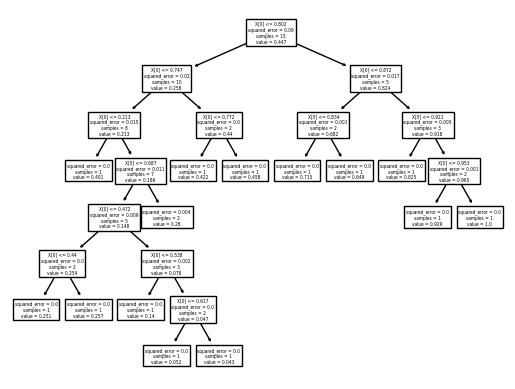

In [12]:
lin_reg('Poverty','Riots',X_train, X_test, y_train, y_test)
poly_reg('Poverty','Riots',X_train, X_test, y_train, y_test)
svm('Poverty','Riots',X_train, X_test, y_train, y_test)
decision_tree('Poverty','Riots',X_train, X_test, y_train, y_test)
random_for('Poverty','Riots',X_train, X_test, y_train, y_test)
xgboost('Poverty','Riots',X_train, X_test, y_train, y_test)

# Poverty vs Dacoity

In [13]:
X = np.array(scaled_df['Poverty']).reshape(-1,1)
y = np.array(scaled_df['Dacoity']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)

Poverty Vs Dacoity  Linear Regression


MAE of Linear Regression: 0.14004247204990786
MSE of Linear Regression: 0.026599350379070595
Coefficient of determination 0.7674673047230729
Correlation: 0.8853099597546678


Poverty Vs Dacoity  Polynomial Regression


MAE of Poly : 0.12619842383642116
MSE of Poly: 0.022761385363171932
Coefficient of Determination: 0.8010189643240414
Correlation: 0.9378119463486262


Poverty Vs Dacoity  SVM with hypermeter


MAE: 0.09271266804143682
MSE: 0.011990779004110278
Coefficient of determination: 0.895176080597455
Correlation: 0.9600041578107804


Poverty Vs Dacoity  Decision tree


MAE: 0.10497675401521558
MSE: 0.02055359825476925
Coefficient of determination: 0.8203195366913455
Correlation: 0.9297712635352432




Poverty Vs Dacoity  Random Forest


MAE: 0.10370130670611441
MSE: 0.01581172604753123
Coefficient of determination: 0.8617731928631672
Correlation: 0.9415796101157804


Poverty Vs Dacoity  Xgboost


[17:15:03] WARNING: C:/buildkite-agent/builds

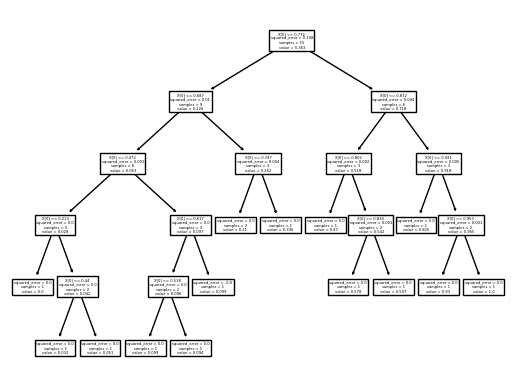

In [14]:
lin_reg('Poverty','Dacoity',X_train, X_test, y_train, y_test)
poly_reg('Poverty','Dacoity',X_train, X_test, y_train, y_test)
svm('Poverty','Dacoity',X_train, X_test, y_train, y_test)
decision_tree('Poverty','Dacoity',X_train, X_test, y_train, y_test)
random_for('Poverty','Dacoity',X_train, X_test, y_train, y_test)
xgboost('Poverty','Dacoity',X_train, X_test, y_train, y_test)

# Poverty vs Buglary

In [15]:
X = np.array(scaled_df['Poverty']).reshape(-1,1)
y = np.array(scaled_df['Buglary']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)

Poverty Vs Buglary  Linear Regression


MAE of Linear Regression: 0.2804040736524028
MSE of Linear Regression: 0.09284368329104567
Coefficient of determination 0.4326459652062702
Correlation: 0.7491996219013923


Poverty Vs Buglary  Polynomial Regression


MAE of Poly : 0.14625159279128827
MSE of Poly: 0.03775245178676317
Coefficient of Determination: 0.7693003434877557
Correlation: 0.8811002756309692


Poverty Vs Buglary  SVM with hypermeter


MAE: 0.1732109733241342
MSE: 0.03833478326502426
Coefficient of determination: 0.7657418018393903
Correlation: 0.9258421277354917


Poverty Vs Buglary  Decision tree


MAE: 0.07362778337762313
MSE: 0.009020500120971525
Coefficient of determination: 0.9448770561649603
Correlation: 0.988156584452519




Poverty Vs Buglary  Random Forest


MAE: 0.10541795935821417
MSE: 0.018752989352837472
Coefficient of determination: 0.8854032520400628
Correlation: 0.9664166910972315


Poverty Vs Buglary  Xgboost


[17:15:04] WARNING: C:/buildkite-agent/builds/bu

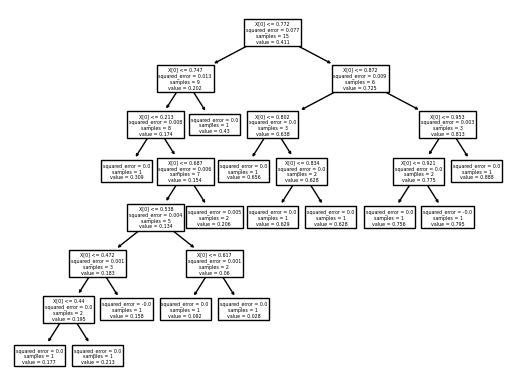

In [16]:
lin_reg('Poverty','Buglary',X_train, X_test, y_train, y_test)
poly_reg('Poverty','Buglary',X_train, X_test, y_train, y_test)
svm('Poverty','Buglary',X_train, X_test, y_train, y_test)
decision_tree('Poverty','Buglary',X_train, X_test, y_train, y_test)
random_for('Poverty','Buglary',X_train, X_test, y_train, y_test)
xgboost('Poverty','Buglary',X_train, X_test, y_train, y_test)

# Plotting Graph For Best Model

## Poverty vs Riots Random Forest

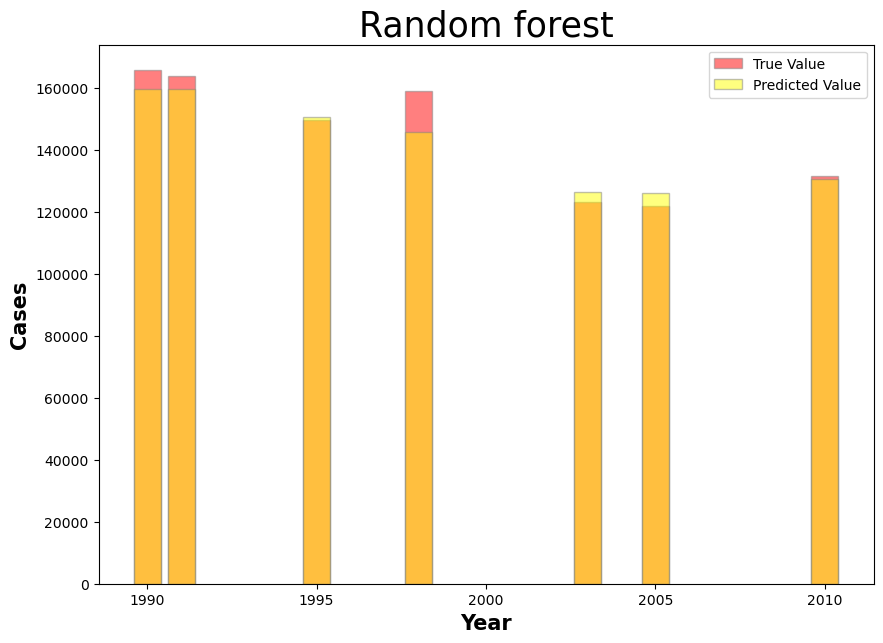

In [17]:
plt.style.use('default')
X = np.array(df['Poverty']).reshape(-1,1)
y = np.array(df['Buglary']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state=42)
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

year=[1990,2003,1998,1991,2005,1995,2010]
true_graph=list(y_test.flatten())
pred_graph=list(y_pred.flatten())

plt.style.use('default')
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.title("Random forest",fontsize=25)
plt.bar(year,true_graph,edgecolor ='grey',label='True Value',color ='red',alpha=0.5)
plt.bar(year,pred_graph,edgecolor ='grey',label='Predicted Value',color ='yellow',alpha=0.5)
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Cases', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

## Poverty vs Buglary Decision Tree

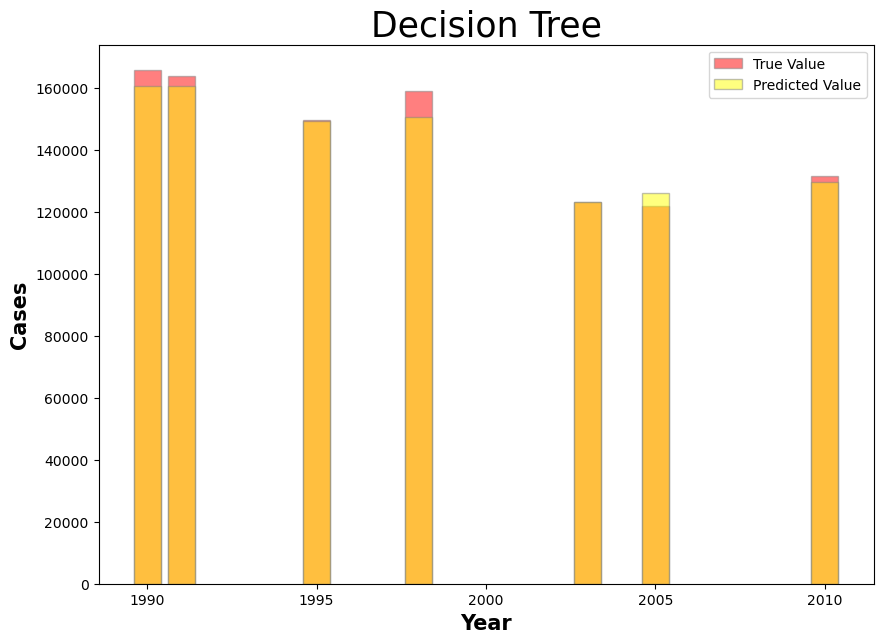

In [18]:
DT_reg = DecisionTreeRegressor(random_state=0);
DT_reg.fit(X_train, y_train);
y_test_DT_pred = DT_reg.predict(X_test);

#graph
true_graph=list(y_test.flatten())
pred_graph=list(y_test_DT_pred.flatten())

plt.style.use('default')
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
#plt.style.use('default')
plt.title("Decision Tree",fontsize=25)
plt.bar(year,true_graph,edgecolor ='grey',label='True Value',color ='red',alpha=0.5)
plt.bar(year,pred_graph,edgecolor ='grey',label='Predicted Value',color ='yellow',alpha=0.5)
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Cases', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

## Poverty vs Dacoity SVM

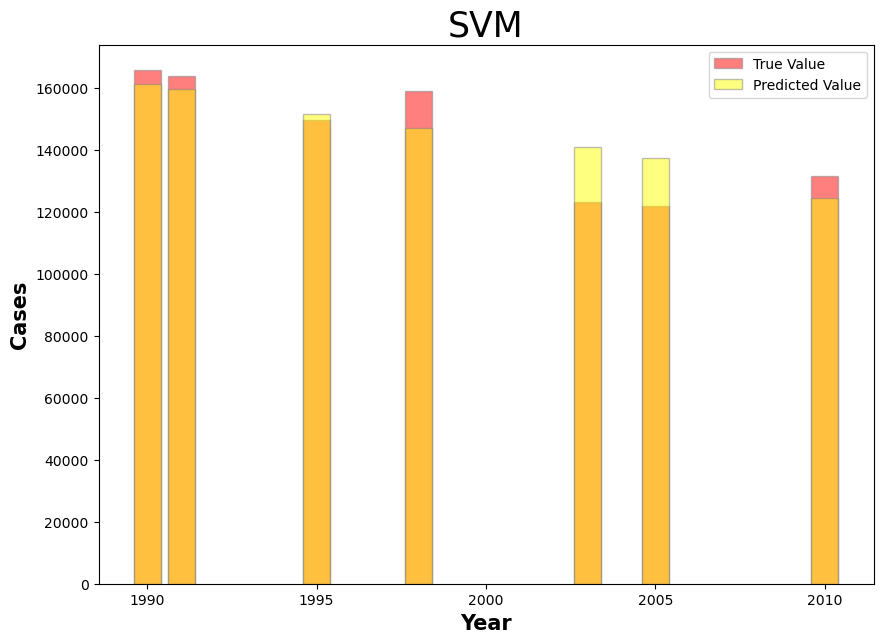

In [19]:
svm_search = SVR(kernel='poly');

svm_search.fit(X_train, y_train) 
y_pred_test = svm_search.predict(X_test)
true_graph=list(y_test.flatten())
pred_graph=list(y_pred_test.flatten())


fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(year,true_graph,edgecolor ='grey',label='True Value',color ='red',alpha=0.5)
plt.bar(year,pred_graph,edgecolor ='grey',label='Predicted Value',color ='yellow',alpha=0.5)
plt.title("SVM",fontsize=25)
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Cases', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()